#### Imports

In [2]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix

#### Read Data

In [3]:
file_name= "TrainData/TrainingData1.json"
data = pd.read_json(file_name)
data.head(5)

,acceX,acceX_raw,acceY,acceY_raw,acceZ,acceZ_raw,anomaly,count,dataType,gpsSpeed,id,imei,journeyID,lat,lon,obdRpm,obdSpeed,time,timeCount
0,-1.110223e-17,0.596156,9.805842,9.810242,0.007124,-0.665588,N,0,data_item,0.218526,55329287-70ca-469f-bfda-11396389de39,353424070112284,3.534241e+27,5.951,80.628,0,0,1530854443926,0
1,5.551115e-18,0.553061,9.802251,9.828198,0.006083,-0.697910,N,0,data_item,0.218526,ff383ffb-b2c1-41db-9bc5-bb85f6e8bc42,353424070112284,3.534241e+27,5.951,80.628,0,0,1530854444031,105
2,0.000000e+00,0.559046,9.797749,9.821015,-0.002761,-0.750582,N,0,data_item,0.218526,48c2bf25-df3d-47a6-af7d-4173690f09a9,353424070112284,3.534241e+27,5.951,80.628,0,0,1530854444119,193
3,0.000000e+00,0.624887,9.797318,9.812635,-0.006004,-0.791284,N,0,data_item,0.218526,5808f386-eea1-47d1-9f14-cf3b6c913254,353424070112284,3.534241e+27,5.951,80.628,0,0,1530854444218,292
4,0.000000e+00,0.590171,9.800958,9.830592,-0.000892,-0.793678,N,0,data_item,0.218526,35767f73-350e-452e-bf26-e67a980ad195,353424070112284,3.534241e+27,5.951,80.628,0,0,1530854444320,394


In [4]:
data.shape

(232, 19)

In [5]:
data.tail(5)

,acceX,acceX_raw,acceY,acceY_raw,acceZ,acceZ_raw,anomaly,count,dataType,gpsSpeed,id,imei,journeyID,lat,lon,obdRpm,obdSpeed,time,timeCount
227,0.000000e+00,0.723049,9.774286,9.722853,-0.001892,-0.481235,N,0,data_item,2.563700,304699ae-3c6a-4119-ade6-eb84f8128084,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853147019,22791
228,-2.220446e-17,0.826000,9.804357,9.698911,-0.058329,-0.573411,N,0,data_item,2.017951,68b0e2b4-a2a1-4dd7-b05d-126ba4cc0671,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853147119,22891
229,0.000000e+00,0.685939,9.801484,9.871294,0.031510,-0.478840,N,0,data_item,2.017951,d157d9a2-8fbe-43e1-a495-88f42187be16,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853147219,22991
230,1.110223e-17,0.511162,9.855498,10.125079,0.024700,-0.421379,N,0,data_item,2.017951,14ceed09-7e9e-48b5-9c5d-fe553b88b73c,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853147319,23091
231,5.551115e-18,0.375890,9.790950,9.902418,0.051042,-0.333991,N,0,data_item,2.017951,fa3aaf40-fa7e-488b-9c3b-5f80e6d72d8d,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853147419,23191


In [6]:
print(data['anomaly'].unique())

['N' 'P']


In [7]:
data.describe()

,acceX,acceX_raw,acceY,acceY_raw,acceZ,acceZ_raw,count,gpsSpeed,imei,journeyID,lat,lon,obdRpm,obdSpeed,time,timeCount
count,2.320000e+02,232.000000,232.000000,232.000000,232.000000,232.000000,232.0,232.000000,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,232.0,232.0,2.320000e+02,232.000000
mean,-3.648901e-19,0.503329,9.800349,9.810618,0.002158,-0.682286,0.0,1.784009,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530854e+12,11590.245690
std,1.605347e-17,0.447726,0.056964,0.276698,0.071298,0.613765,0.0,1.692428,2.192230e+00,1.487550e+13,1.602178e-14,2.848316e-13,0.0,0.0,6.542446e+05,6742.918289
min,-4.822531e-17,-1.195904,9.554882,8.887277,-0.249251,-2.522291,0.0,0.145609,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530853e+12,0.000000
25%,-1.110223e-17,0.307356,9.781349,9.688735,-0.026204,-1.049558,0.0,0.325706,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530853e+12,5788.000000
50%,0.000000e+00,0.576404,9.800718,9.811439,-0.000164,-0.687136,0.0,1.028333,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530854e+12,11569.500000
75%,8.673617e-18,0.724545,9.823631,9.914689,0.024837,-0.390853,0.0,2.563700,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530854e+12,17396.000000
max,4.440892e-17,2.203863,10.220135,11.620258,0.372273,1.521515,0.0,6.269142,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530854e+12,23191.000000


#### Feature Extraction

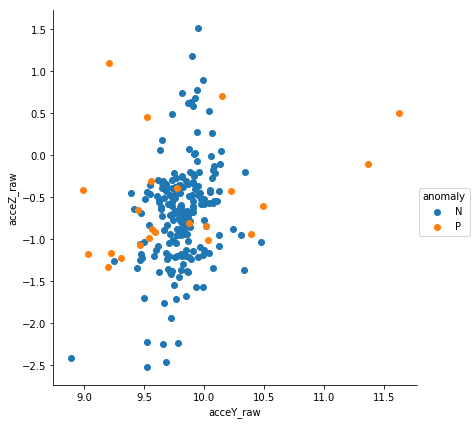

In [8]:
sns.FacetGrid(data, hue="anomaly", size=6) \
   .map(plt.scatter, "acceY_raw", "acceZ_raw") \
   .add_legend()

plt.show()

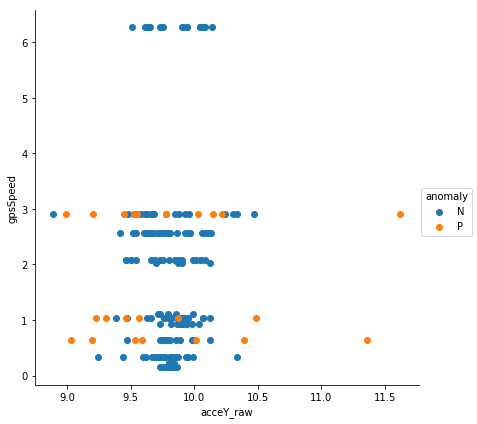

In [9]:
sns.FacetGrid(data, hue="anomaly", size=6) \
   .map(plt.scatter, "acceY_raw", "gpsSpeed") \
   .add_legend()

plt.show()

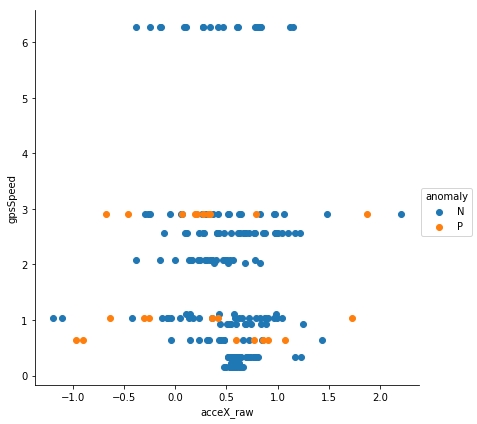

In [10]:
sns.FacetGrid(data, hue="anomaly", size=6) \
   .map(plt.scatter, "acceX_raw", "gpsSpeed") \
   .add_legend()

plt.show()

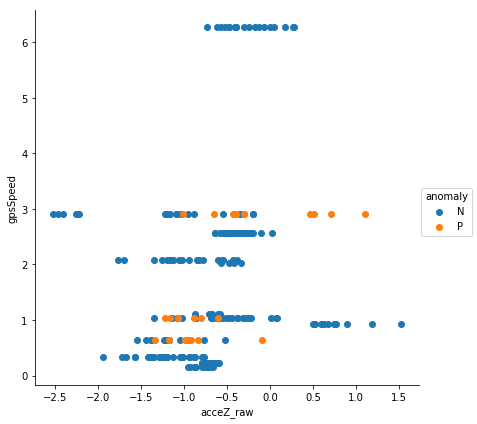

In [11]:
sns.FacetGrid(data, hue="anomaly", size=6) \
   .map(plt.scatter, "acceZ_raw", "gpsSpeed") \
   .add_legend()

plt.show()

In [12]:
acceleration_features = ['acceX','acceX_raw','acceY','acceY_raw','acceZ','acceZ_raw',]
acceleration_data = data[acceleration_features]


Text(0.5,1,'Acceleration Data Correlations')

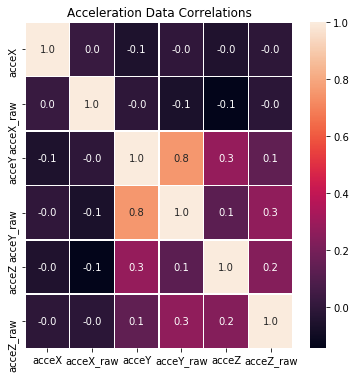

In [13]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(acceleration_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Acceleration Data Correlations')

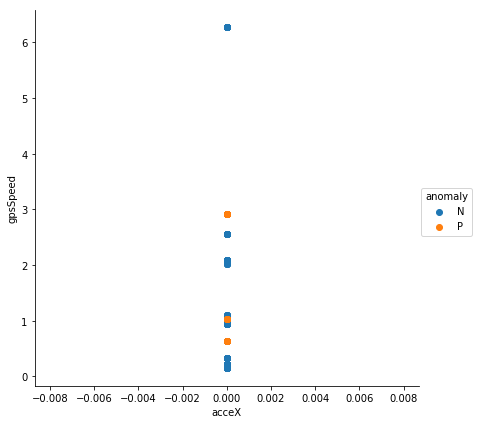

In [14]:
sns.FacetGrid(data, hue="anomaly", size=6) \
   .map(plt.scatter, "acceX", "gpsSpeed") \
   .add_legend()

plt.show()

In [15]:
data.shape

(232, 19)

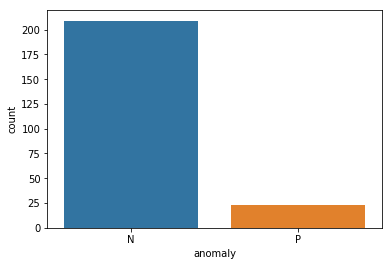

In [16]:
sns.countplot(data['anomaly'],label="Count")
plt.show()

In [17]:
features = list(data.columns[0:18]) 
features = ['gpsSpeed', 'acceY_raw',]

In [18]:
target = data.columns[6]   

In [19]:
print('Features:',features)
print('Target:',target)

Features: ['gpsSpeed', 'acceY_raw']
Target: anomaly


In [20]:
x = data[features]
x.head()

,gpsSpeed,acceY_raw
0,0.218526,9.810242
1,0.218526,9.828198
2,0.218526,9.821015
3,0.218526,9.812635
4,0.218526,9.830592


In [21]:
x.shape

(232, 2)

In [22]:
y = data[target]
y.head()

0    N
1    N
2    N
3    N
4    N
Name: anomaly, dtype: object

#### Over Sampling

In [23]:
#randomOverSampler = RandomOverSampler()
sm = SMOTE()
x_os, y_os = sm.fit_sample(x, y)

In [24]:
x = pd.DataFrame(x)
x.head()
x.shape

(232, 2)

In [25]:
y = pd.DataFrame(y)
y.head()
#y.shape

,anomaly
0,N
1,N
2,N
3,N
4,N


In [26]:
y_os = pd.DataFrame(y_os)
y_os.head()

,0
0,N
1,N
2,N
3,N
4,N


In [27]:
y_os['anomaly'] = y_os
y_os.head()

,0,anomaly
0,N,N
1,N,N
2,N,N
3,N,N
4,N,N


In [28]:
y_os = y_os['anomaly']
y_os.head()

0    N
1    N
2    N
3    N
4    N
Name: anomaly, dtype: object

In [29]:
y_os = pd.DataFrame(y_os)
y_os['anomaly'] = y_os
y_os.head()

,anomaly
0,N
1,N
2,N
3,N
4,N


In [30]:
y_os = pd.DataFrame(y_os)
y_os.head()

,anomaly
0,N
1,N
2,N
3,N
4,N


In [31]:
x_os = pd.DataFrame(x_os)
x_os.head()

,0,1
0,0.218526,9.810242
1,0.218526,9.828198
2,0.218526,9.821015
3,0.218526,9.812635
4,0.218526,9.830592


In [32]:
x_os['gpsSpeed'] = x_os[0]
x_os['acceY_raw'] = x_os[1]
x_os.head()

,0,1,gpsSpeed,acceY_raw
0,0.218526,9.810242,0.218526,9.810242
1,0.218526,9.828198,0.218526,9.828198
2,0.218526,9.821015,0.218526,9.821015
3,0.218526,9.812635,0.218526,9.812635
4,0.218526,9.830592,0.218526,9.830592


In [33]:
fea = ['gpsSpeed', 'acceY_raw',]
x_os = x_os[fea]
x_os.head()

,gpsSpeed,acceY_raw
0,0.218526,9.810242
1,0.218526,9.828198
2,0.218526,9.821015
3,0.218526,9.812635
4,0.218526,9.830592


In [34]:
#x_os = pd.DataFrame(x_os)
#x_os['gpsSpeed'] = x_os
#x_os.head()

In [35]:
#x_os = pd.DataFrame(x_os)
#x_os.head()

In [36]:
x_os.shape

(418, 2)

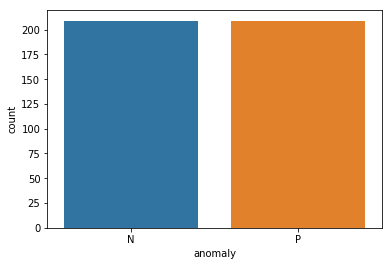

In [37]:
sns.countplot(y_os['anomaly'],label="Count")
plt.show()

#### Test train split for training data set

In [38]:
x_test, x_val = train_test_split(x_os, test_size=0.25, random_state=0, shuffle=False)

In [39]:
x_test.shape

(313, 2)

In [40]:
x_val.shape

(105, 2)

In [41]:
y_test, y_val = train_test_split(y_os, test_size=0.25, random_state=0, shuffle=False)

In [42]:
y_test.shape

(313, 1)

In [43]:
y_val.shape

(105, 1)

#### Basic Model Random Forest

In [44]:
forestModel = RandomForestClassifier()

#### Grid Serach Parmeter tuning

In [45]:
parameters = [{'max_depth' : [1,2,3,4,5,6,10,20], 'n_estimators' : [1,2,3,4,5,10,20,30,40,50,60,70,80,100],
               'min_samples_leaf' : [0.01,0.02,0.03,0.005]}]
grid = GridSearchCV(forestModel,parameters,cv=3)

In [46]:
grid.fit(x_os,y_os)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 10, 20], 'n_estimators': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 100], 'min_samples_leaf': [0.01, 0.02, 0.03, 0.005]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.03, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Crosss Validation

In [48]:
forestModel = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.005, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### 3 Folds 

In [49]:
cross_validation_scores = cross_val_score(forestModel, x_os,y_os)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [50]:
cross_validation_scores

array([0.45      , 0.8       , 0.46376812])

In [51]:
print("Mean of cross validation scores: ")
np.mean(cross_validation_scores)

Mean of cross validation scores: 


0.571256038647343

#### 30 Folds 

In [52]:
cross_validation_scores = cross_val_score(forestModel, x_os,y_os, cv=30 )

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

In [53]:
cross_validation_scores

array([0.71428571, 0.78571429, 1.        , 0.92857143, 1.        ,
       1.        , 1.        , 0.92857143, 0.78571429, 0.64285714,
       0.57142857, 0.78571429, 0.85714286, 0.71428571, 0.5       ,
       1.        , 0.78571429, 0.78571429, 0.85714286, 0.64285714,
       0.42857143, 0.5       , 0.92857143, 0.5       , 0.5       ,
       0.57142857, 0.92857143, 0.92857143, 0.78571429, 0.83333333])

In [54]:
print("Mean of cross validation scores: ")
np.mean(cross_validation_scores)

Mean of cross validation scores: 


0.7730158730158728

#### 10 Folds 

In [55]:
cross_validation_scores = cross_val_score(forestModel, x_os,y_os, cv=10 )
cross_validation_scores
print("Mean of cross validation scores: ")
np.mean(cross_validation_scores)

Mean of cross validation scores: 


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

0.7653571428571428

# 20 Folds 

In [56]:
cross_validation_scores = cross_val_score(forestModel, x_os,y_os, cv=20 )
cross_validation_scores
print("Mean of cross validation scores: ")
np.mean(cross_validation_scores)

Mean of cross validation scores: 


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

0.7906818181818183

# Predictions done using model

In [57]:
file_name_test1= "Test_Data/j7ThalallaRandom2.json"
data_test1 = pd.read_json(file_name_test1)
data_test1.head(5)

,acceX,acceX_raw,acceY,acceY_raw,acceZ,acceZ_raw,anomaly,count,dataType,gpsSpeed,id,imei,journeyID,lat,lon,obdRpm,obdSpeed,time
0,-1.110223e-17,0.657208,9.800814,9.791088,0.010758,-0.387861,N,0,data_item,6.983249,023b5c7d-54ae-476b-bce5-1745c3afc352,353424070112284,3.534241e+27,5.977,80.654,0,0,1530857828488
1,0.000000e+00,0.593762,9.803065,9.870096,0.021103,-0.513556,N,0,data_item,6.983249,f863d8be-1784-44f2-8189-ffb7121d3306,353424070112284,3.534241e+27,5.977,80.654,0,0,1530857828573
2,-1.387779e-18,0.629675,9.770551,9.691729,0.006531,-0.566229,N,0,data_item,6.983249,cc50c1a0-04ae-4aa0-94f9-d1f297bd0b55,353424070112284,3.534241e+27,5.977,80.654,0,0,1530857828665
3,0.000000e+00,0.658405,9.796935,9.743204,-0.007959,-0.411803,N,0,data_item,6.983249,259c3a52-1480-4c7d-9f9c-e2e7861ab67e,353424070112284,3.534241e+27,5.977,80.654,0,0,1530857828763
4,1.110223e-17,0.893037,9.811732,9.743204,-0.032536,-0.322020,N,0,data_item,6.983249,ef2f8dcb-e6a1-4517-b454-f33f52e3d68d,353424070112284,3.534241e+27,5.977,80.654,0,0,1530857828864


In [58]:
print(data_test1['anomaly'].unique())

['N' 'P']


In [59]:
forestModel.fit(x_os,y_os)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.005, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
features_test1 = ['gpsSpeed','acceY_raw',]
x_test1 = data_test1[features_test1]
features_acceY_raw_test1 = ['acceY_raw',]
acceY_raw_test1 = data_test1[features_acceY_raw_test1]
x_test1.head()

,gpsSpeed,acceY_raw
0,6.983249,9.791088
1,6.983249,9.870096
2,6.983249,9.691729
3,6.983249,9.743204
4,6.983249,9.743204


In [61]:
data_test1.shape

(2610, 18)

In [62]:
number = []
value = []
for i in  range(2610):
    number.append(i)
    value.append(1)
#print(value)

d = {'number': number, 'value': value,}
number = pd.DataFrame(data=d)
number.head()

,number,value
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [63]:
acceY_raw_test1.head()

,acceY_raw
0,9.791088
1,9.870096
2,9.691729
3,9.743204
4,9.743204


In [64]:
x_test1.shape

(2610, 2)

In [65]:
y_test1 = pd.DataFrame(forestModel.predict(x_test1))
y_test1.head()

,0
0,N
1,N
2,N
3,N
4,N


In [66]:
y_test1['anomaly'] = y_test1
y_test1.head()

,0,anomaly
0,N,N
1,N,N
2,N,N
3,N,N
4,N,N


In [67]:
y_test1 = y_test1['anomaly']
y_test1.head()

0    N
1    N
2    N
3    N
4    N
Name: anomaly, dtype: object

In [68]:
y_test1 = pd.DataFrame(y_test1)
y_test1['anomaly'] = y_test1
y_test1.head()

,anomaly
0,N
1,N
2,N
3,N
4,N


In [69]:
y_test1 = pd.DataFrame(y_test1)
y_test1.head()

,anomaly
0,N
1,N
2,N
3,N
4,N


In [70]:
result1 = pd.concat([x_test1, y_test1,acceY_raw_test1,number,], axis=1)
result1.head()

,gpsSpeed,acceY_raw,anomaly,acceY_raw,number,value
0,6.983249,9.791088,N,9.791088,0,1
1,6.983249,9.870096,N,9.870096,1,1
2,6.983249,9.691729,N,9.691729,2,1
3,6.983249,9.743204,N,9.743204,3,1
4,6.983249,9.743204,N,9.743204,4,1


In [71]:
result1.shape

(2610, 6)

In [72]:
result1.describe()
print(result1.groupby('anomaly').size())

anomaly
N    1807
P     803
dtype: int64


# Predicted Results

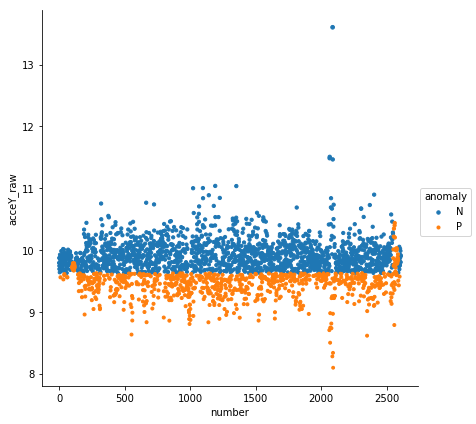

In [73]:
sns.FacetGrid(result1, hue="anomaly", size=6) \
   .map(plt.scatter, "number", "acceY_raw") \
   .add_legend()

plt.show()

In [74]:
data_test2 = pd.concat([data_test1,number,], axis=1)
#data_test2.head()

In [75]:
data_test2.describe()
print(data_test2.groupby('anomaly').size())

anomaly
N    2579
P      31
dtype: int64


# Actual Result

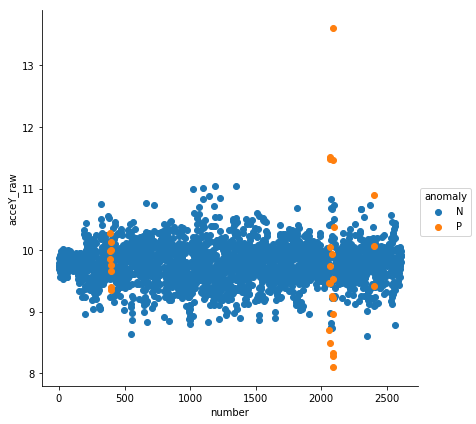

In [76]:
sns.FacetGrid(data_test2, hue="anomaly", size=6) \
   .map(plt.scatter, "number", "acceY_raw") \
   .add_legend()

plt.show()